# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [6]:
##############################
#   Author: Benjamin Toups
#      Date: 4/13/2020
##############################

# Import needed modules here
import os
import matplotlib.pyplot as plt
import re
os.getcwd()

'/home/btoup15/IntroCompBio/Week11/Week11Assignments'

In [7]:
# Your code here...

def stateCases(data = '/home/btoup15/IntroCompBio/Week11/covidData_4.7.20.csv', state = 'Louisiana', stat = 'cases'):
    '''Accepts an input file, a state, and a statistic to display in order to display that statistic over time'''
    cumulatives = []
    # Opens the data file and creates a list of dates from the input state making sure that no one date appears twice
    with open(data,'r') as f:
        dates = re.findall(r'(.+),.+,{},.+,.+,.+'.format(state),f.read())
        dateList = []
        for i in dates:
            if i in dateList:
                pass
            elif i not in dateList:
                dateList.append(i)
        f.close()
    # Checks whether the input statistic is cases or deaths and proceeds accordingly
    # For each date in the list of dates, sums the statistic for every reported county in the state at that date
    # Finally, appends the sum at that date to the list of cumulative totals declared at the beginning of the function
    if stat == 'cases':
        for date in dateList:
            with open(data, 'r') as f:
                dateCases = re.findall(r'{},.+,{},.+,(.+),.+'.format(date,state),f.read())
                dateCases = [int(i) for i in dateCases]
                cumulatives.append(sum(dateCases))
            f.close()
    elif stat == 'deaths':
        for date in dateList:
            with open(data, 'r') as f:
                dateDeaths = re.findall(r'{},.+,{},.+,.+,(.+)'.format(date,state),f.read())
                dateDeaths = [int(i) for i in dateDeaths]
                cumulatives.append(sum(dateDeaths))
            f.close()
    else:
        print('Statistic input error')
    #Checks to make sure the list of dates is the same length as the list of cumulative totals, and returns both if so
    if len(dateList) == len(cumulatives):
        out = [dateList,cumulatives]
        return out
    else:
        print("There was an error in the function")        

Enter a state to display: Louisiana
Enter a statistic to display: deaths


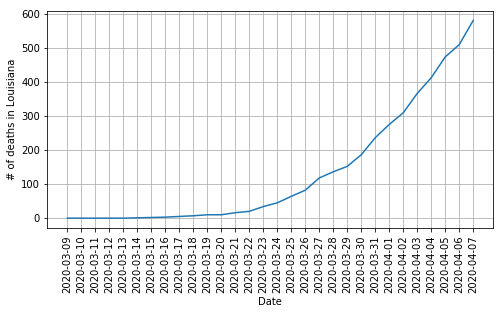

In [8]:
# Use your function to create a plot here

# Prompts user inputs for state and statistic and calls the function using them
stateIn = input("Enter a state to display: ")
statIn = input("Enter a statistic to display: ")
funcOut = stateCases(state = stateIn, stat = statIn)
# Various plt plot paramaters
plt.figure(figsize = (8,4))
plt.ylabel('# of {} in {}'.format(statIn, stateIn))
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(funcOut[0],funcOut[1])
plt.show()

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [9]:
# Your code here...
def countyCases(data = '/home/btoup15/IntroCompBio/Week11/covidData_4.7.20.csv', county = 'Jefferson',state = 'Louisiana', stat = 'cases'):
    '''Accepts an input file, a state, and a statistic to display in order to display that statistic over time'''
    cumulatives = []
    # Opens the data file and creates a list of dates from the input state county
    with open(data,'r') as f:
        cumulatives = []
        dateList = re.findall(r'(.+),{},{},.+,.+,.+'.format(county,state),f.read())
        f.close()
    # Checks whether the input statistic is cases or deaths and proceeds accordingly
    # For each date in the list of dates, finds the statistic for the given date in the input state county
    # Finally, appends the statistic at that date to the list of cumulative totals declared at the beginning of the function
    if stat == 'cases':
        for date in dateList:
            with open(data, 'r') as f:
                dateCases = int(re.search(r'{},{},{},.+,(.+),.+'.format(date,county,state),f.read()).group(1))
                cumulatives.append(dateCases)   
            f.close()
    elif stat == 'deaths':
        for date in dateList:
            with open(data, 'r') as f:
                dateCases = int(re.search(r'{},{},{},.+,.+,(.+)'.format(date,county,state),f.read()).group(1))
                cumulatives.append(dateCases)   
            f.close()
    else:
        print('Statistic input error')
    #Checks to make sure the list of dates is the same length as the list of cumulative totals, and returns both if so
    if len(dateList) == len(cumulatives):
        out = [dateList,cumulatives]
        return out
    else:
        print("There was an error in the function")

Enter a county to display: Jefferson
Enter the state in which the county resides: Louisiana
Enter a statistic to display: cases


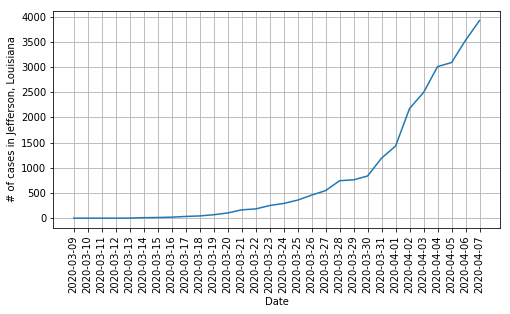

In [10]:
# Use your function to create a plot here

# Prompts user inputs for county, state, and statistic and calls the function using them
countyIn = input("Enter a county to display: ")
stateIn = input("Enter the state in which the county resides: ")
statIn = input("Enter a statistic to display: ")
funcOut = countyCases(county = countyIn, state = stateIn, stat = statIn)
# Various plt plot paramaters
plt.figure(figsize = (8,4))
plt.ylabel('# of {} in {}, {}'.format(statIn,countyIn,stateIn))
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(funcOut[0],funcOut[1])
plt.show()